In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("synthetic_df.csv")

In [5]:
df.head()

,age,region_code,state_code,city_code,duration,campaign,pdays,previous,postal code,employment_indicator,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,56.0,3,1,1,307,1,999,0,42420,5710.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,45.0,3,1,1,198,1,999,0,42420,5710.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,59.0,4,2,2,139,1,999,0,90036,5710.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,41.0,3,3,3,217,1,999,0,33311,5710.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,24.0,3,3,3,380,1,999,0,33311,5710.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [7]:
df.shape

(82976, 55)

In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
x.head()

,age,region_code,state_code,city_code,duration,campaign,pdays,previous,postal code,employment_indicator,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56.0,3,1,1,307,1,999,0,42420,5710.1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,45.0,3,1,1,198,1,999,0,42420,5710.1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,59.0,4,2,2,139,1,999,0,90036,5710.1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,41.0,3,3,3,217,1,999,0,33311,5710.1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24.0,3,3,3,380,1,999,0,33311,5710.1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [15]:
df['y'].value_counts().get(1)

27176

In [17]:
df['y'].value_counts().get(0)

55800

In [19]:
y_1_percent = df['y'].value_counts().get(1)/df.shape[0]
y_1_percent*100

32.75163902815272

In [21]:
y_0_percent = df['y'].value_counts().get(0)/df.shape[0]
y_0_percent*100

67.24836097184728

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
xtrain.shape

(66380, 54)

In [27]:
ytrain.shape

(66380,)

## Logistic Regression

In [30]:
lmodel = LogisticRegression(solver='newton-cg',max_iter=500)

In [32]:
LRmodel = lmodel.fit(xtrain,ytrain)

In [33]:
ypred = LRmodel.predict(xtest)

In [34]:
ypred[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [35]:
def metric_score(ytest,ypred):
    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    recall = recall_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    conf_matrix = confusion_matrix(ytest, ypred)
    
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('Confusion Matrix:\n', conf_matrix)
    
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.87
Precision: 0.81
Recall: 0.77
F1 Score: 0.79
Confusion Matrix:
 [[10204   964]
 [ 1243  4185]]


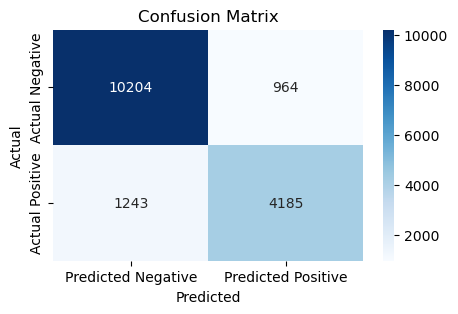

In [36]:
metric_score(ytest,ypred)

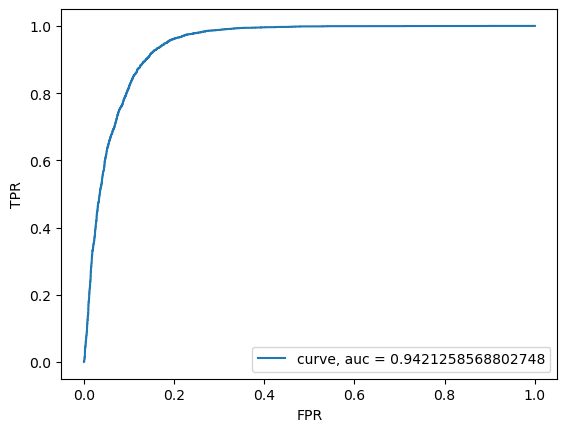

In [37]:
ypred = LRmodel.predict_proba(xtest)[:,-1]
fpr, tpr, _ = metrics.roc_curve(ytest,ypred)
auc = metrics.roc_auc_score(ytest,ypred)
plt.plot(fpr,tpr,label="curve, auc = "+str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)
plt.show()

## Decision Tree

In [39]:
no_cols = df.columns
len(no_cols)

55

In [40]:
DTmodel = DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,max_leaf_nodes=10,min_samples_split=4,max_features='log2')

In [41]:
dtmodel = DTmodel.fit(xtrain,ytrain)

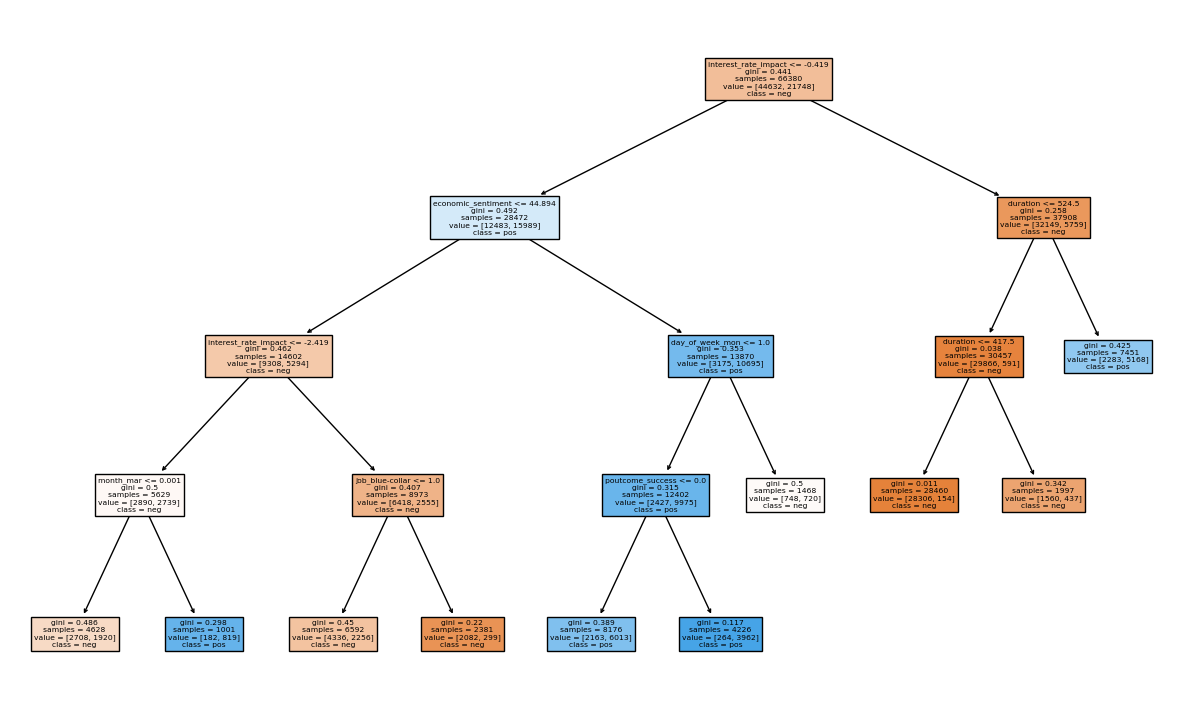

In [42]:
plt.figure(figsize=(15,9))
plot_tree(dtmodel,feature_names=xtrain.columns,class_names=['neg','pos'],filled=True)
plt.show()

In [52]:
DTpred = dtmodel.predict(xtest)

Accuracy: 0.84
Precision: 0.77
Recall: 0.73
F1 Score: 0.75
Confusion Matrix:
 [[9960 1208]
 [1444 3984]]


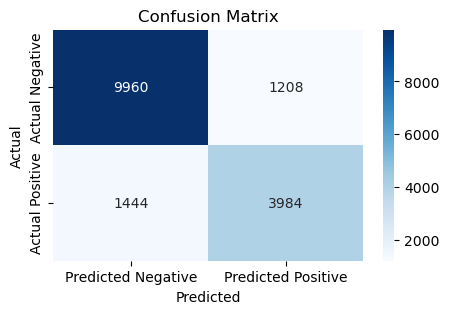

In [54]:
metric_score(ytest,DTpred)

## Random forest

In [57]:
RFmodel = RandomForestClassifier(n_estimators=250,max_depth=5,min_samples_leaf=2,max_leaf_nodes=10,min_samples_split=4,max_features='log2')

In [59]:
rfmodel = RFmodel.fit(xtrain,ytrain)

In [60]:
importances = rfmodel.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': xtrain.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                          Feature  Importance
4                        duration    0.201953
12           interest_rate_impact    0.114134
6                           pdays    0.080820
9            employment_indicator    0.074398
53               poutcome_success    0.057550
10                 consumer_index    0.057374
52           poutcome_nonexistent    0.054092
38              contact_telephone    0.040658
44                      month_may    0.032274
32    education_university.degree    0.027928
24                marital_married    0.027067
25                 marital_single    0.026149
13                job_blue-collar    0.023875
34                default_unknown    0.022662
11             economic_sentiment    0.021631
43                      month_mar    0.018120
46                      month_oct    0.012594
36                    housing_yes    0.012304
17                    job_retired    0.012180
29          education_high.school    0.011843
48                day_of_week_mon 

In [61]:
rfpred = rfmodel.predict(xtest)

Accuracy: 0.86
Precision: 0.90
Recall: 0.64
F1 Score: 0.75
Confusion Matrix:
 [[10786   382]
 [ 1958  3470]]


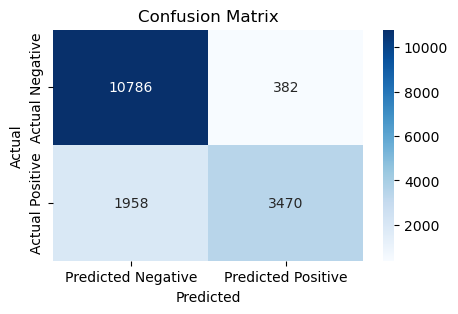

In [62]:
metric_score(ytest,rfpred)

## KNN

In [64]:
KNNmodel = KNeighborsClassifier()

In [65]:
knnmodel = KNNmodel.fit(xtrain,ytrain)

In [72]:
knnpred = knnmodel.predict(xtest)

Accuracy: 0.91
Precision: 0.84
Recall: 0.89
F1 Score: 0.87
Confusion Matrix:
 [[10258   910]
 [  571  4857]]


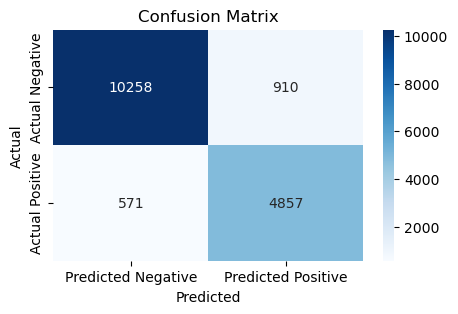

In [73]:
metric_score(ytest,knnpred)

## Gradient Boosting 

In [77]:
XGmodel = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=5)

In [79]:
xgmodel = XGmodel.fit(xtrain,ytrain)

In [81]:
xgpred = xgmodel.predict(xtest)

Accuracy: 0.94
Precision: 0.92
Recall: 0.90
F1 Score: 0.91
Confusion Matrix:
 [[10757   411]
 [  567  4861]]


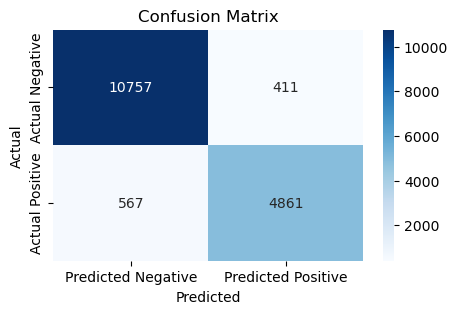

In [83]:
metric_score(ytest,xgpred)

Among all the models, XGBoost exhibits the highest precision.   

## Model building based on feature importance

In [87]:
data = df[['age', 'state_code', 'city_code', 'duration', 'pdays', 'postal code',  'employment_indicator', 'consumer_index', 'economic_sentiment',  'interest_rate_impact', 'job_blue-collar', 'marital_married',  'marital_single', 'education_high.school',  'education_university.degree', 'housing_yes', 'contact_telephone',  'month_may', 'poutcome_nonexistent', 'poutcome_success','y']]

In [89]:
data.head()

,age,state_code,city_code,duration,pdays,postal code,employment_indicator,consumer_index,economic_sentiment,interest_rate_impact,...,marital_married,marital_single,education_high.school,education_university.degree,housing_yes,contact_telephone,month_may,poutcome_nonexistent,poutcome_success,y
0,56.0,1,1,307,999,42420,5710.1,57.594,58.694,5.3427,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0
1,45.0,1,1,198,999,42420,5710.1,57.594,58.694,5.3427,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0
2,59.0,2,2,139,999,90036,5710.1,57.594,58.694,5.3427,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0
3,41.0,3,3,217,999,33311,5710.1,57.594,58.694,5.3427,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0
4,24.0,3,3,380,999,33311,5710.1,57.594,58.694,5.3427,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0


In [91]:
x= data.iloc[:,:-1]
y = data.iloc[:,-1]

In [93]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [95]:
def model_train_pred(model):
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    metric_score(ytest, pred)

## Logistic regression

Accuracy: 0.86
Precision: 0.80
Recall: 0.75
F1 Score: 0.77
Confusion Matrix:
 [[10154  1014]
 [ 1365  4063]]


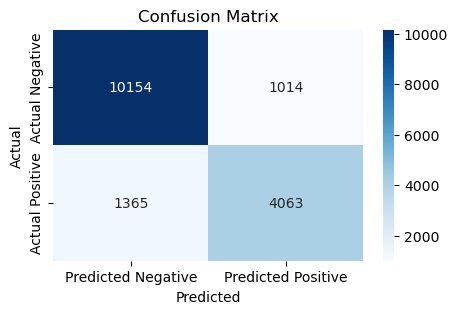

In [98]:
lmodel = LogisticRegression(solver='newton-cg',max_iter=500)
model_train_pred(lmodel)

## Decision Tree

Accuracy: 0.86
Precision: 0.74
Recall: 0.86
F1 Score: 0.80
Confusion Matrix:
 [[9509 1659]
 [ 744 4684]]


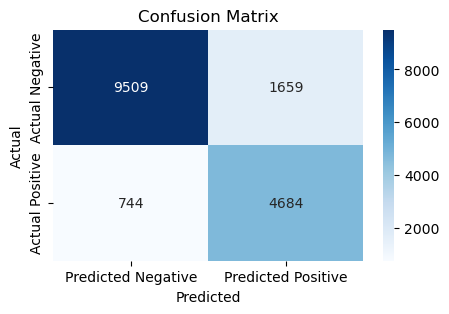

In [100]:
DTmodel = DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,max_leaf_nodes=10,min_samples_split=4,max_features='log2')
model_train_pred(DTmodel)


## Random forest

Accuracy: 0.88
Precision: 0.86
Recall: 0.75
F1 Score: 0.80
Confusion Matrix:
 [[10524   644]
 [ 1339  4089]]


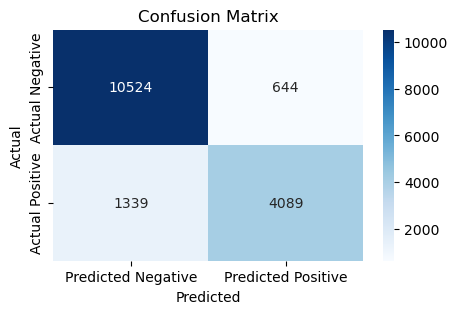

In [102]:
RFmodel = RandomForestClassifier(n_estimators=250,max_depth=5,min_samples_leaf=2,max_leaf_nodes=10,min_samples_split=4,max_features='log2')
model_train_pred(RFmodel)

## KNN

Accuracy: 0.91
Precision: 0.84
Recall: 0.89
F1 Score: 0.87
Confusion Matrix:
 [[10261   907]
 [  579  4849]]


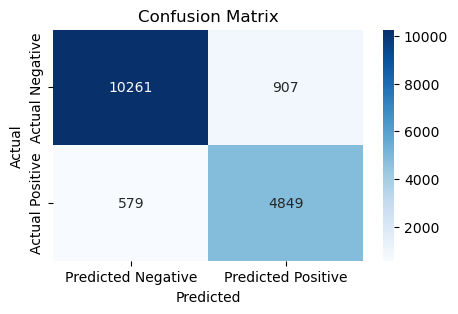

In [104]:
KNNmodel = KNeighborsClassifier()
model_train_pred(KNNmodel)

## Gradient Boosting

Accuracy: 0.94
Precision: 0.91
Recall: 0.89
F1 Score: 0.90
Confusion Matrix:
 [[10703   465]
 [  592  4836]]


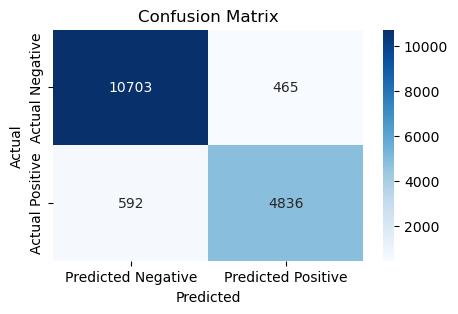

In [106]:
XGmodel = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=5)
model_train_pred(XGmodel)

## Hyperparameter tuning

In [108]:
models = {
    'Logistic Regression': LogisticRegression(solver='newton-cg',max_iter=500),
    'Decision Tree': DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,max_leaf_nodes=10,min_samples_split=4,max_features='log2'),
    'Random Forest': RandomForestClassifier(n_estimators=250,max_depth=5,min_samples_leaf=2,max_leaf_nodes=10,min_samples_split=4,max_features='log2'),
    'XGBoost': XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=5),
    "KNN":KNeighborsClassifier()
}

In [109]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

results=[]
names=[]
for name, model in models.items():

    kfold= KFold(n_splits=5)

    cv_results=cross_val_score(model,x,y,cv=kfold,scoring="precision")

    results.append(cv_results)

    names.append(name)

    outcome= "%s : %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)

    print(outcome)
 

Logistic Regression : 61.446390 (23.637326)
Decision Tree : 46.370352 (35.730002)
Random Forest : 61.835209 (25.987494)
XGBoost : 73.627531 (17.860824)
KNN : 65.553518 (22.397574)


In [110]:
# Define the parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Various solvers
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'max_iter': [100, 200, 500]  # Iterations
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],  # Tree depth
        'min_samples_leaf': [1, 2, 5],  # Minimum samples at leaf nodes
        'min_samples_split': [2, 5, 10],  # Minimum samples to split
        'max_features': ['auto', 'log2']  # Number of features to consider
    },
    'Random Forest': {
        'n_estimators': [100, 250, 500],  # Number of trees
        'max_depth': [5, 10, None],  # Tree depth
        'min_samples_leaf': [1, 2, 5],  # Minimum samples at leaf nodes
        'max_features': ['auto', 'log2']  # Number of features to consider
    },
    'XGBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 2, 5]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10],  # Number of neighbors
        'weights': ['uniform', 'distance'],  # Weighting method
        'metric': ['euclidean', 'manhattan']  # Distance metric
    }
}

# Perform Grid Search for each model
best_models = {}

for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}...")
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='precision')
    
    # Fit Grid Search
    grid_search.fit(xtrain, ytrain)
    
    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Print the best parameters
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation precision for {model_name}: {grid_search.best_score_:.4f}")

# best_models now contains the best tuned models for each algorithm


Running Grid Search for Logistic Regression...
Best parameters for Logistic Regression: {'C': 100, 'max_iter': 200, 'solver': 'newton-cg'}
Best cross-validation precision for Logistic Regression: 0.8020
Running Grid Search for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation precision for Decision Tree: 0.8383
Running Grid Search for Random Forest...
Best parameters for Random Forest: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 500}
Best cross-validation precision for Random Forest: 0.8734
Running Grid Search for XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 150}
Best cross-validation precision for XGBoost: 0.9447
Running Grid Search for KNN...
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation precision for 

After evaluating the important features, it is noted that XGBoost demonstrates strong precision.

In [125]:
import pickle
classifier = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=5)

classifier.fit(xtrain,ytrain)

pickle.dump(classifier,open('model.pkl','wb'))